# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and datascience libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling 
6. Experimentation

## 1. Problem definition

In a statement,
> Giving clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Source:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting wether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

| Feature | Details | 
| :- | :- | 
| age | age in years. |
| sex | * 1 = male <br>* 0 = female). |
| cp | chest pain type. <br>* 0 = Typical angina<br>* 1 = Atypical angina <br>* 2 = Non angina pain, <br>* 3 = Asymptomatic |
| trestbps | resting blood pressure <br>(in mm Hg on admission to the hospital). <br>Anything above 130-140 is cause of concern. |
| chol | serum cholestoral in mg/dl. <br>serum = LDL + HDL + .2 * triglycerides <br>Above 200 is cause of concern. |
| fbs | (fasting blood sugar &gt; 120 mg/dl) <br>* 1 = true<br>* 0 = false |
| restecg | electrocardiographic results. <br>* 0 = Nothing to note<br>* 1 = ST-T Wabe abnormality <br>* 2 = Possible left ventricular hypertrophy |
| thalach | maximum heart rate achieved. |
| exang | exercise induced angina. <br>* 1 = yes <br>* 0 = no). |
| oldpeak | ST depression induced by exercise relative to rest. |
| slope | the slope of the peak exercise ST segment. <br>* 0 = Upsloping - excercise is needed <br>* 1 = Flatsloping - healthy heart <br>* 2 = Downsloping - unhealthy heart |
| ca | number of major vessels (0-3) colored by flourosopy. |
| thal | * 1,3 = normal <br>* 6 = fixed defect <br>* 7 = reversable defect |
| target | have disease or not. <br>* 1 = yes <br>* 0 = no) |

### Preparing the tools

We're going to use Pandas, Matplotlib, and Numpy for data analysis and manipulation.

In [83]:
# Import all the tools we need 
import expectexception

# Regular EDA (Exploratory Data Analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Setting the configuration
%matplotlib inline

sns.set()
plt_params = {'axes.titlesize':'10',
              'xtick.labelsize':'8',
              'ytick.labelsize':'8',
              'axes.labelsize': '8',
              #'figure.figsize': (5, 15),
              'legend.fontsize': '8'}
rcParams.update(plt_params)
# # To retunr to default
# plt.style.use('default')

### Load data

In [3]:
df = pd.read_csv('data/heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Exploration (Exploratory Data Analysis)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

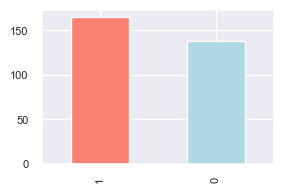

In [7]:
df.target.value_counts().plot.bar(figsize=(3,2), color=['salmon', 'lightblue']);

In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


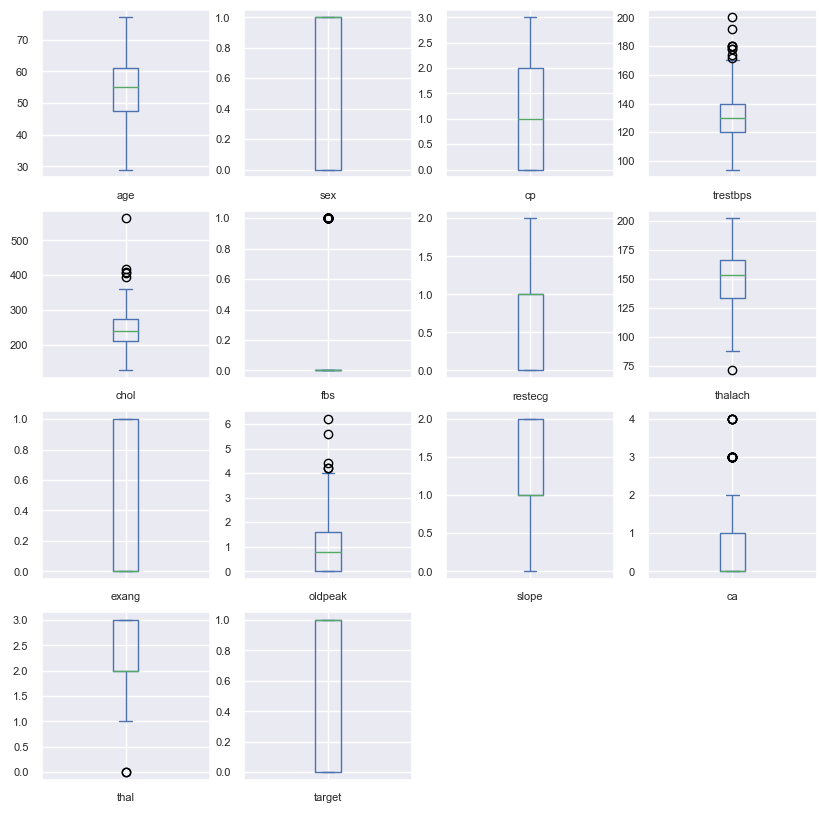

In [10]:
# Finding outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10));

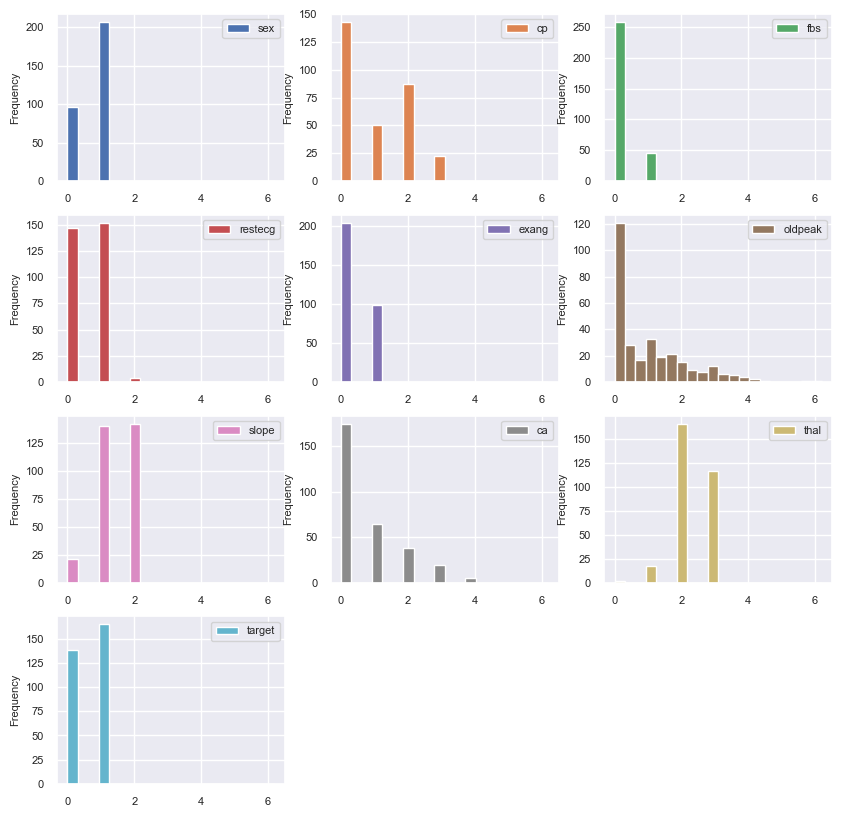

In [11]:
# How the data behaves
df[['sex','cp', 'fbs', 'restecg', 'exang' , 'oldpeak', 'slope' , 'ca', 'thal', 'target']].plot(
    kind='hist', subplots=True, layout=(4,3), figsize=(10,10), bins=20, sharex=False);

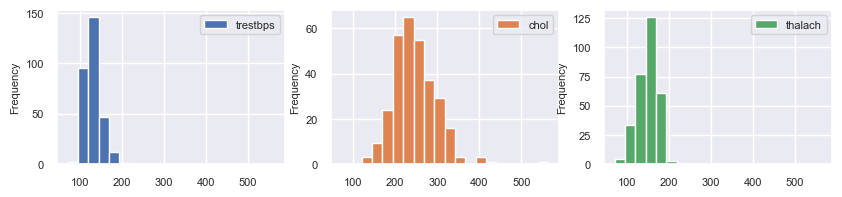

In [12]:
df[['trestbps', 'chol', 'thalach']].plot(
    kind='hist', subplots=True, layout=(1,3), figsize=(10,2), bins=20, sharex=False);

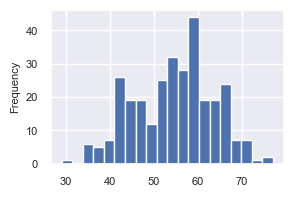

In [13]:
df['age'].plot(kind='hist', figsize=(3,2), bins=20);

**Heart Disease Frequency according to Sex**

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
## Create a plot of crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


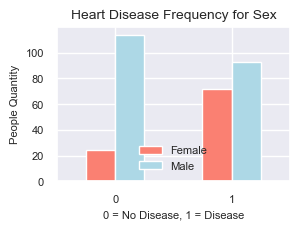

In [225]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(3,2), color=['salmon', 'lightblue'], rot=0)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('People Quantity')
plt.legend(['Female', 'Male'], loc='lower center');

**Age vs. Max Heart Rate for Heart Disease**

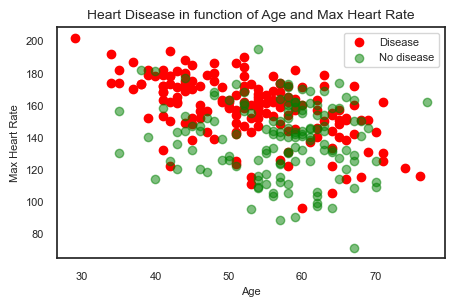

In [17]:
with sns.axes_style("white"):
    # Create another figure
    plt.figure(figsize=(5,3))
    
    # Scatter with positive examples
    plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
                c='red', label='Disease')

    # Scatter with negative examples
    plt.scatter(df.age[df.target==0], df.thalach[df.target==0],
                c='green', alpha=0.5, label='No disease')
    
    # Add some helpful info
    plt.title('Heart Disease in function of Age and Max Heart Rate')
    plt.xlabel('Age')
    plt.ylabel('Max Heart Rate')
    plt.legend();

**Heart Disease Frequency per Chest Pain type**

cp = chest pain type.
* 0 = Typical angina
* 1 = Atypical angina
* 2 = Non angina pain,
* 3 = Asymptomatic

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


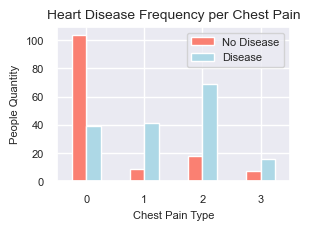

In [19]:
# Compare target column with sex column
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(3,2), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency per Chest Pain')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('People Quantity')
plt.legend(['No Disease', 'Disease']);

**Correlation matrix**

In [20]:
# Compute the correlation matrix
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


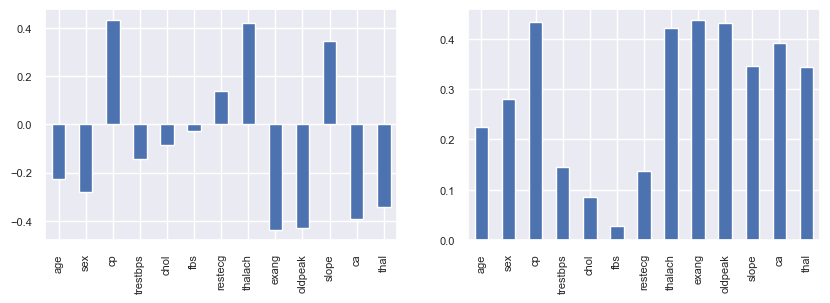

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
corr.target.iloc[:-1].plot.bar(ax=ax[0]);
corr.target.iloc[:-1].abs().plot.bar(ax=ax[1]);

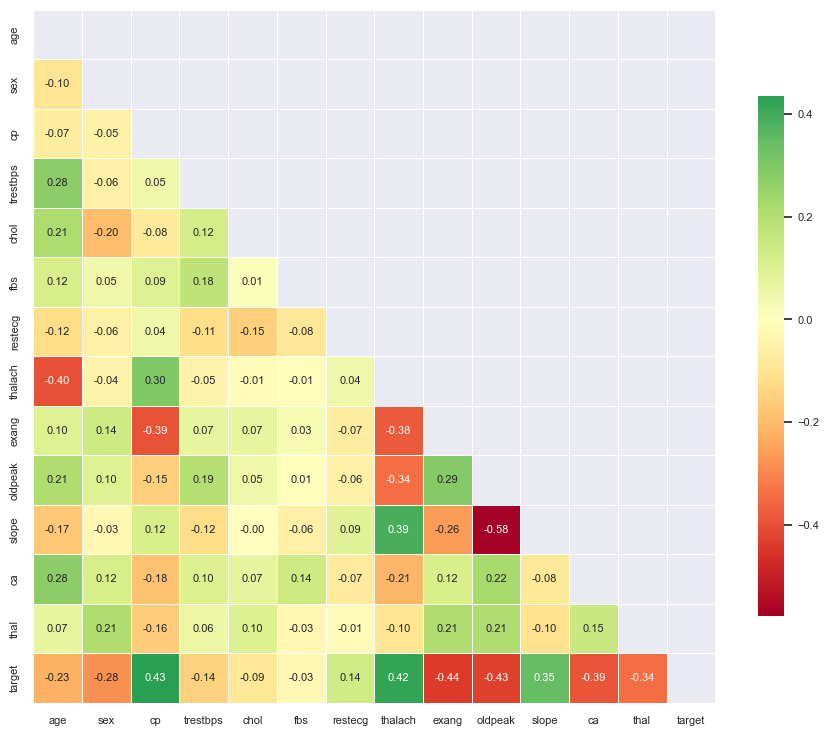

In [22]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Let's make our correlation matrix more visual
#sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(11,9))
ax = sns.heatmap(corr, linewidths='.5', center=0, 
                 annot=True, fmt='.2f', annot_kws={'fontsize': 8},
                 mask=mask, cmap='RdYlGn', cbar_kws={"shrink": .75})
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom+0.5, top-0.5);

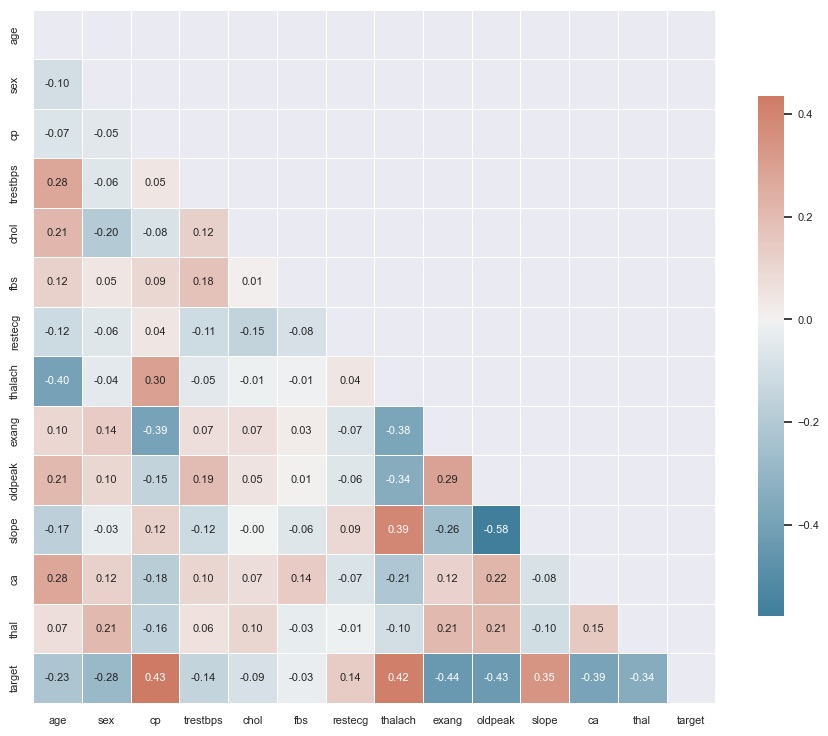

In [23]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.set_theme(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, #vmax=.3, 
            annot=True, fmt='.2f', annot_kws={'fontsize': 8},
            square=False, linewidths=.5, cbar_kws={"shrink": .75});

**A golobal view**

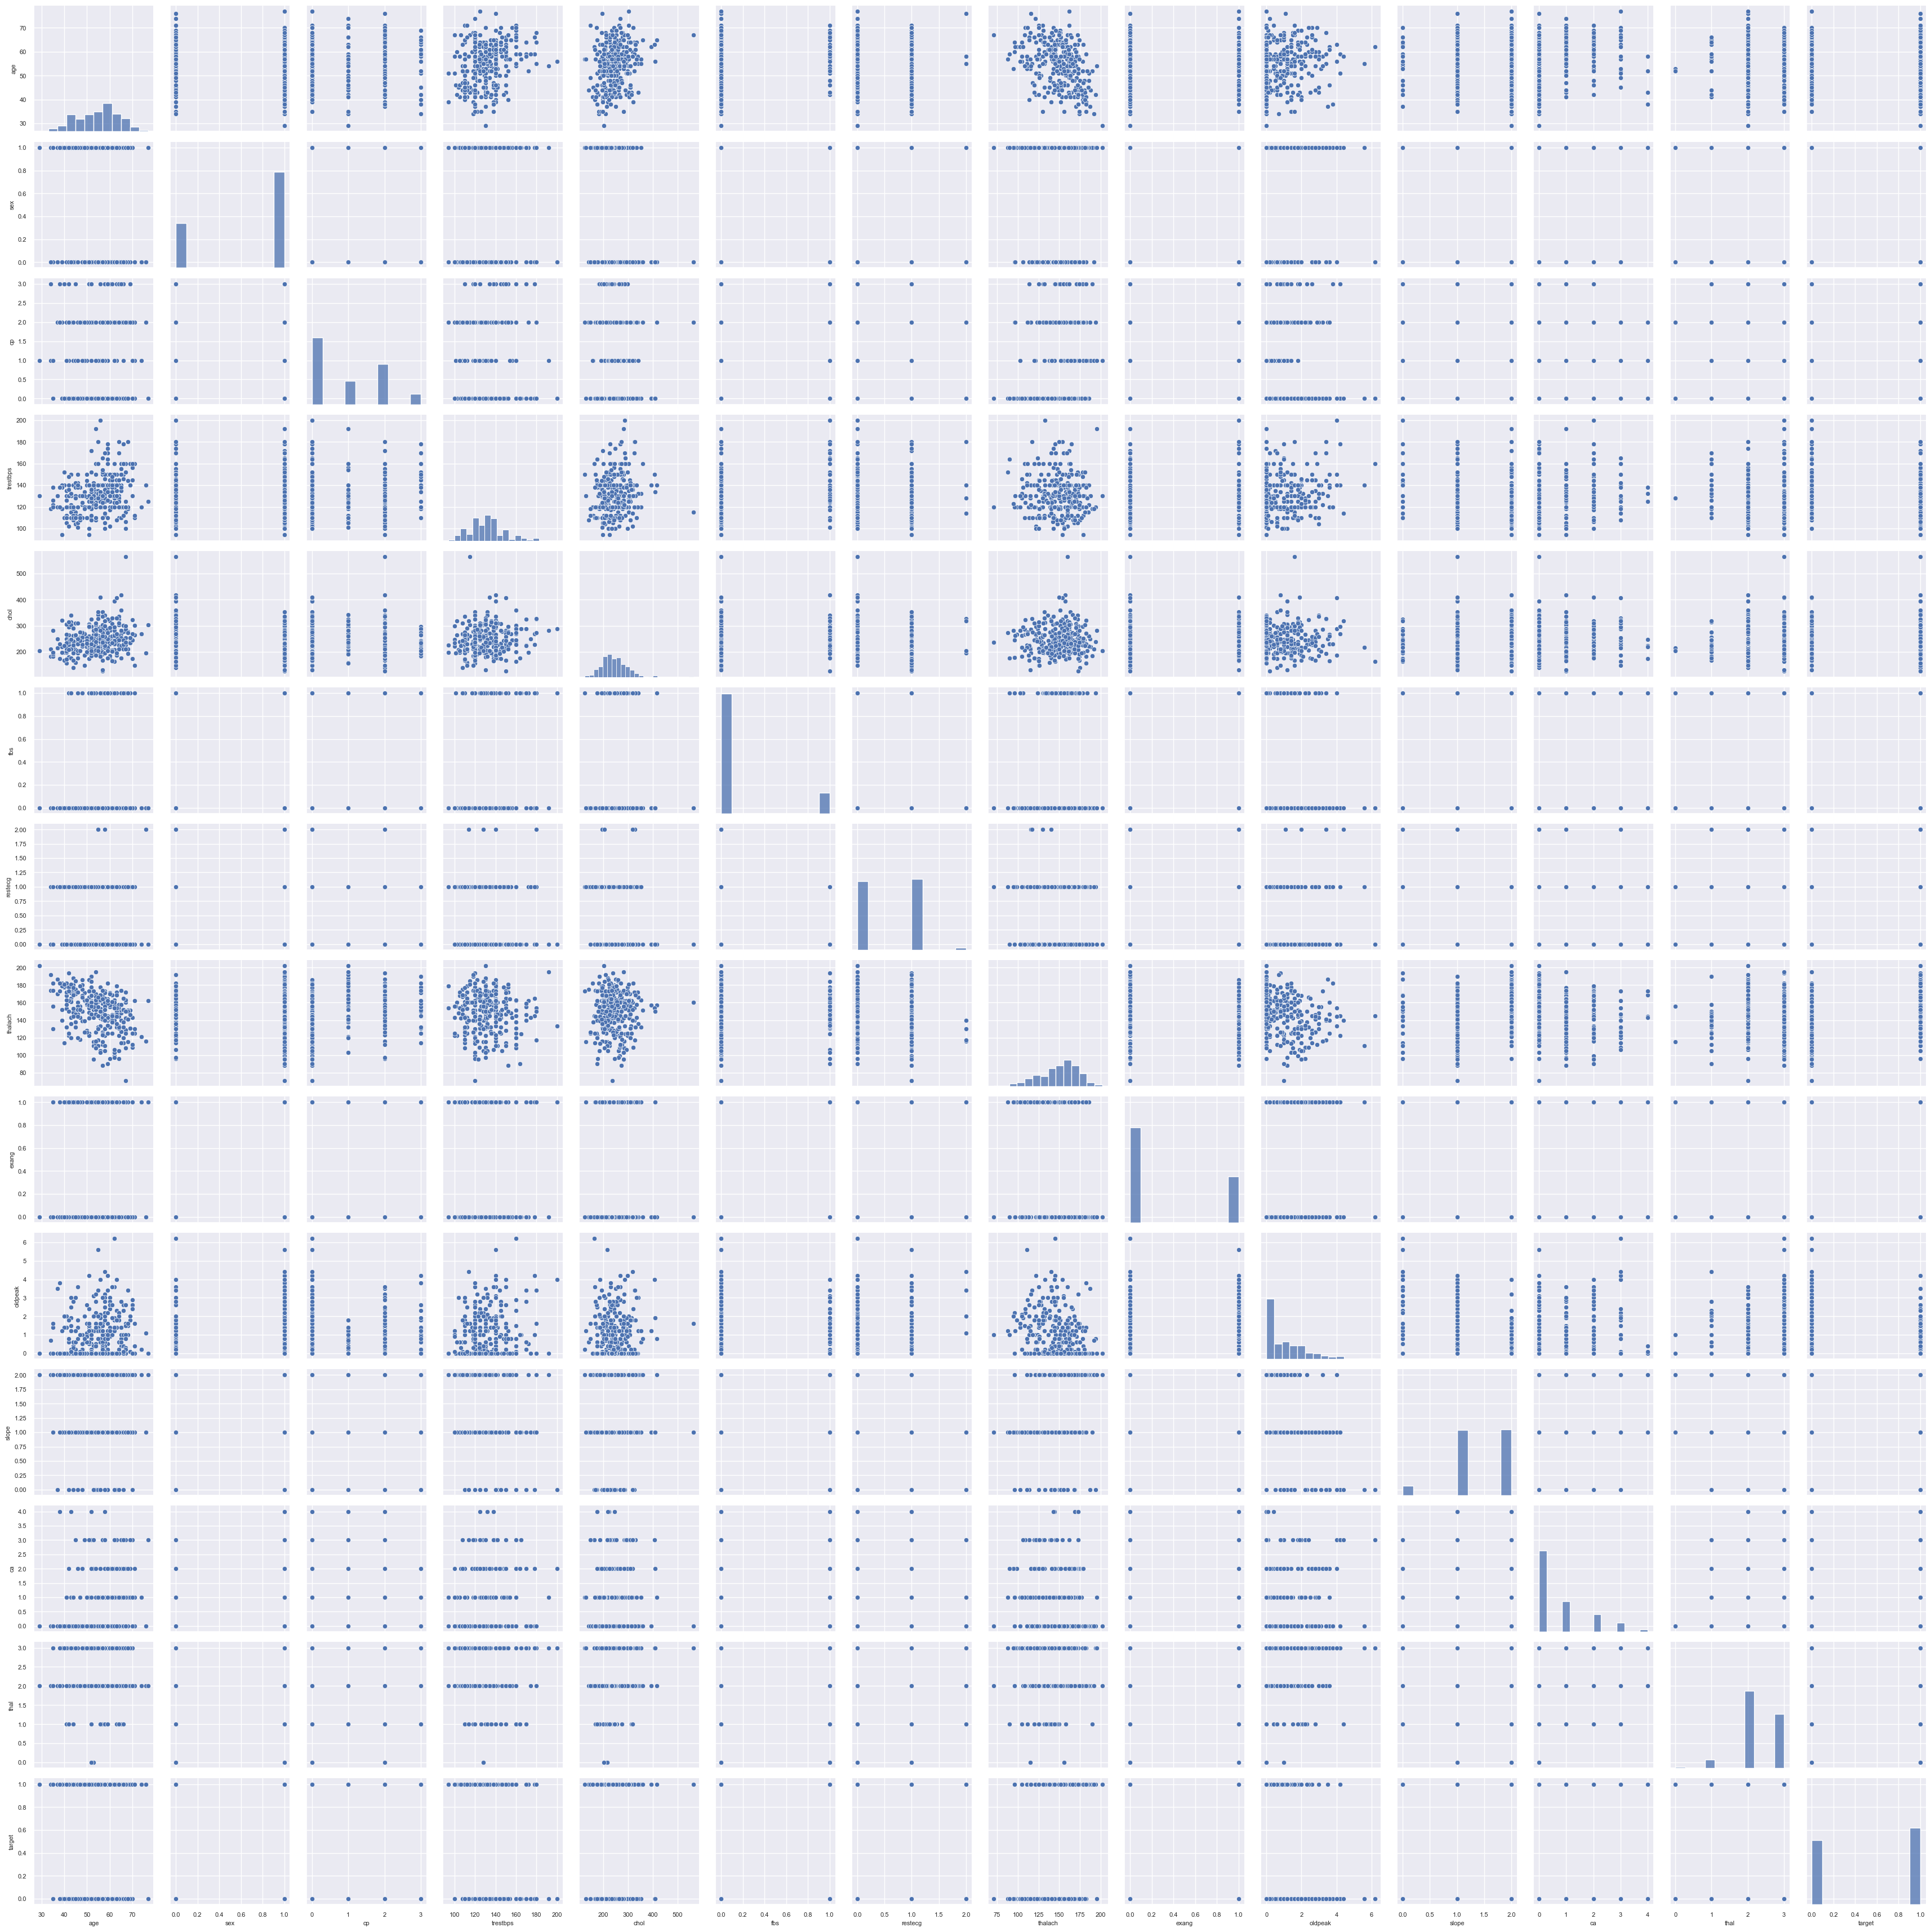

In [24]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

## 5. Modeling 

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
# Split data into X & y
X = df.drop(['target'], axis=1)
y = df.target

# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Puts model in a dictionary
models = {'Logistic': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RandomForest': RandomForestClassifier()}

# Create a funtion to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    Parameters:
        models: a dict of different scikit-learn machine learning models.
        X_train: training data (no labels).
        X_test: testing data (no labels).
        y_train: training labels.
        y_test:  testing labels.
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model_type in models.items():
        # Set random seed
        np.random.seed(42)
    
        # Set the model
        model = make_pipeline(MinMaxScaler(), model_type)
        
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

**Baseline model**

In [27]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic': 0.8524590163934426,
 'KNN': 0.8360655737704918,
 'RandomForest': 0.8360655737704918}

**Model comparisson**

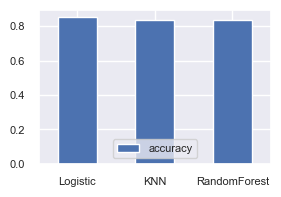

In [28]:
pd.DataFrame(model_scores, index=['accuracy']).T.plot.bar(figsize=(3,2))
plt.legend(loc='lower center')
plt.xticks(rotation=0);

Now we have got a baseline model...
What should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

**Hyperparameter tuning**

In [29]:
# Let's tune Logistic
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    # Set the model
    np.random.seed(42)
    knn.set_params(n_neighbors=i)
    model = make_pipeline(MinMaxScaler(), knn)
    
    # Fit the algorithm
    model.fit(X_train, y_train)
    
    # Evaluate the model and save the result
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

In [30]:
print(test_scores)

[0.8032786885245902, 0.7540983606557377, 0.8524590163934426, 0.7868852459016393, 0.8360655737704918, 0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.8360655737704918, 0.8360655737704918, 0.819672131147541, 0.8360655737704918, 0.8360655737704918, 0.8032786885245902, 0.8360655737704918, 0.8360655737704918, 0.819672131147541, 0.8524590163934426]


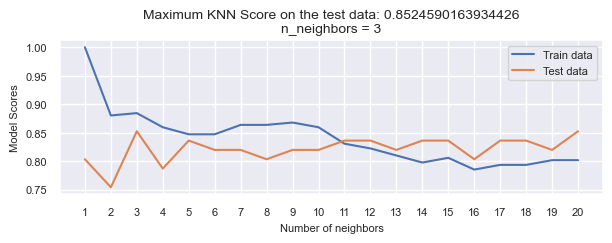

In [31]:
plt.figure(figsize=(7,2))
plt.plot(neighbors, train_scores, label='Train data')
plt.plot(neighbors, test_scores, label='Test data')
plt.xlabel('Number of neighbors')
plt.xticks(np.arange(1,21,1))
plt.ylabel('Model Scores')
plt.legend()
plt.title(f'Maximum KNN Score on the test data: {max(test_scores)}\n' + \
          f'n_neighbors = {np.argmax(test_scores)+1}');

In [32]:
# Puts model in a dictionary
models = {'Logistic': LogisticRegression(),
          'KNN': KNeighborsClassifier(n_neighbors=np.argmax(test_scores)+1),
          'RandomForest': RandomForestClassifier()}
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic': 0.8524590163934426,
 'KNN': 0.8524590163934426,
 'RandomForest': 0.8360655737704918}

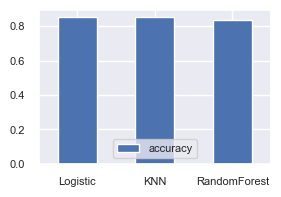

In [33]:
pd.DataFrame(model_scores, index=['accuracy']).T.plot.bar(figsize=(3,2))
plt.legend(loc='lower center')
plt.xticks(rotation=0);

**RandomizedSearchCV**

In [34]:
models['Logistic'].get_params(), models['KNN'].get_params(), models['RandomForest'].get_params()

({'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'metric_params': None,
  'n_jobs': None,
  'n_neighbors': 3,
  'p': 2,
  'weights': 'uniform'},
 {'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False})

In [63]:
# Create hyperparameter grid for LogisticRegression
lr_grid = {
    'logisticregression__C': np.logspace(-4, 4, 30),
    'logisticregression__solver': ['liblinear'],
    'logisticregression__fit_intercept': [True, False]
}
rf_grid = {
    'randomforestclassifier__n_estimators': np.arange(10, 1000, 50),
    'randomforestclassifier__max_depth': [None, 3, 5, 10],
    'randomforestclassifier__min_samples_split': np.arange(2, 20, 2),
    'randomforestclassifier__min_samples_leaf': np.arange(1, 20, 2)
}

In [64]:
# Setup random parameters search for LogisticRegression
np.random.seed(42)
model = make_pipeline(MinMaxScaler(), LogisticRegression()) 
rs_lr_reg = RandomizedSearchCV(model, lr_grid, cv=5, 
                               n_iter=20, verbose=1, error_score=True)
rs_lr_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score=True,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=20,
                   param_distributions={'logisticregression__C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.039195...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'logisticregression__fit_intercept': [True,
                                                                              False],
                                        'logisticregression__solver': ['liblinear']},
                   verbose=1)

In [65]:
print(rs_lr_reg.best_params_)
rs_lr_reg.score(X_test, y_test)

{'logisticregression__solver': 'liblinear', 'logisticregression__fit_intercept': False, 'logisticregression__C': 2.592943797404667}


0.8688524590163934

In [38]:
# Setup random parameters search for RandomForestClassifier
np.random.seed(42)
model = make_pipeline(MinMaxScaler(), RandomForestClassifier()) 
rs_rf_reg = RandomizedSearchCV(model, rf_grid, cv=5, n_iter=20, verbose=1, error_score=True)
rs_rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score=True,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20,
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              3,
                                                                              5,
                                                                              10],
                                        'randomforestclassifier__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'randomforestclassifier__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'randomforestclassifier__n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [50]:
print(rs_rf_reg.best_params_)
rs_rf_reg.score(X_test, y_test)

{'randomforestclassifier__n_estimators': 210, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__min_samples_leaf': 19, 'randomforestclassifier__max_depth': 3}


0.8688524590163934

In [126]:
# Puts model in a dictionary
lr_params = {'solver': rs_lr_reg.best_params_['logisticregression__solver'],
             'C': rs_lr_reg.best_params_['logisticregression__C'],
             'fit_intercept': rs_lr_reg.best_params_['logisticregression__fit_intercept']}
rf_params = {'n_estimators': rs_rf_reg.best_params_['randomforestclassifier__n_estimators'],
             'min_samples_split': rs_rf_reg.best_params_['randomforestclassifier__min_samples_split'],
             'min_samples_leaf': rs_rf_reg.best_params_['randomforestclassifier__min_samples_leaf'],
             'max_depth': rs_rf_reg.best_params_['randomforestclassifier__max_depth']}
models = {'Logistic': LogisticRegression(**lr_params),
          'KNN': KNeighborsClassifier(n_neighbors=np.argmax(test_scores)+1),
          'RandomForest': RandomForestClassifier(**rf_params)}
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
best_model = models[max(model_scores, key=model_scores.get)]
model_scores

{'Logistic': 0.8688524590163934,
 'KNN': 0.8524590163934426,
 'RandomForest': 0.8688524590163934}

**GridSearchCV**

In [66]:
# Setup exhaustive parameters search for LogisticRegression
np.random.seed(42)
model = make_pipeline(MinMaxScaler(), LogisticRegression()) 
gs_lr_reg = GridSearchCV(model, lr_grid, cv=5, verbose=1, error_score=True)
gs_lr_reg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, error_score=True,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.0...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'logisticregression__fit_intercept': [True, False],
                         'logisticregression__solver': ['liblinear']},
             verbose=1)

In [67]:
print(gs_lr_reg.best_params_)
gs_lr_reg.score(X_test, y_test)

{'logisticregression__C': 4.893900918477489, 'logisticregression__fit_intercept': False, 'logisticregression__solver': 'liblinear'}


0.8524590163934426

**Selecting the best model**

In [137]:
best_model.fit(X_train, y_train)
y_preds = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)
y_pred_pos = y_probs[:, 1]

print('Accuracy     Score: ', best_model.score(X_test, y_test))
print('Roc Accuracy Score: ', roc_auc_score(y_test, y_preds))
print('Presicion    Score: ', precision_score(y_test, y_preds))
print('Recall       Score: ', recall_score(y_test, y_preds))
print('F1           Score: ', f1_score(y_test, y_preds))
print('Confusion matrix  : \n', confusion_matrix(y_test, y_preds))
print('\nClassification Report: \n', classification_report(y_test, y_preds))
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

Accuracy     Score:  0.8688524590163934
Roc Accuracy Score:  0.8685344827586206
Presicion    Score:  0.875
Recall       Score:  0.875
F1           Score:  0.875
Confusion matrix  : 
 [[25  4]
 [ 4 28]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



,0,1,accuracy,macro avg,weighted avg
precision,0.862069,0.875,0.868852,0.868534,0.868852
recall,0.862069,0.875,0.868852,0.868534,0.868852
f1-score,0.862069,0.875,0.868852,0.868534,0.868852
support,29.000000,32.000,0.868852,61.000000,61.000000


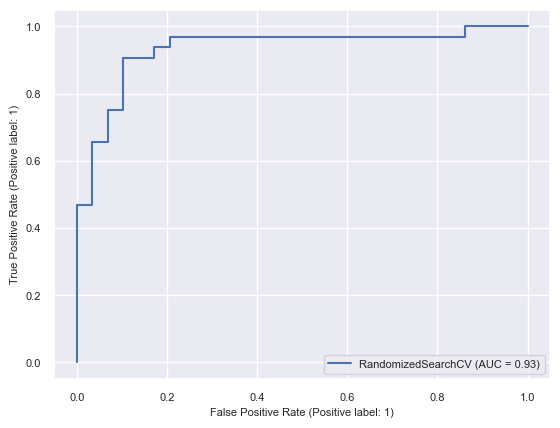

In [74]:
RocCurveDisplay.from_estimator(rs_rf_reg, X_test, y_test) 
plt.show()

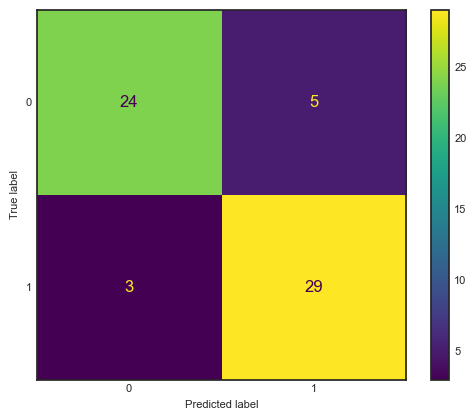

In [80]:
plt.style.use('seaborn-white')
ConfusionMatrixDisplay.from_estimator(rs_rf_reg, X_test, y_test)
plt.show();

**Calculating evaluation metrics usign cross-validations**

In [138]:
print('CV Accuracy    : ', cross_val_score(best_model, X_test, y_test).mean())
print('CV Roc Accuracy: ', cross_val_score(best_model, X_test, y_test, scoring='roc_auc').mean())
print('CV Presicion   : ', cross_val_score(best_model, X_test, y_test, scoring='precision').mean())
print('CV Recall      : ', cross_val_score(best_model, X_test, y_test, scoring='recall').mean())
print('CV F1          : ', cross_val_score(best_model, X_test, y_test, scoring='f1').mean())

CV Accuracy    :  0.8192307692307693
CV Roc Accuracy:  0.8925396825396825
CV Presicion   :  0.8361904761904763
CV Recall      :  0.8142857142857143
CV F1          :  0.822011322011322


**Feature importance**

Which features contributed most to the outcomes of the model and how did they contribute?

Finding features importance is different for each machine learning model.

> TIP:
> One way to find feature importance is to search for "(MODEL NAME)" feature importance...

**Feature importance for LogisticRegression**

In [144]:
best_model

LogisticRegression(C=2.592943797404667, fit_intercept=False, solver='liblinear')

In [173]:
features_name = best_model.feature_names_in_
features_weight = best_model.coef_[0]
features_importance = dict(zip(best_model.feature_names_in_, best_model.coef_[0]))
print(features_name)
print(features_weight)
features_importance

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']
[ 0.00959725 -1.52811762  0.82850887 -0.01259245 -0.00256384  0.16883216
  0.59904066  0.02790947 -0.9755613  -0.6143307   0.74268298 -0.809616
 -0.89177194]


{'age': 0.009597247107286414,
 'sex': -1.528117618189478,
 'cp': 0.8285088717725566,
 'trestbps': -0.012592447592225985,
 'chol': -0.002563841511392049,
 'fbs': 0.16883215965916376,
 'restecg': 0.59904066056818,
 'thalach': 0.02790946648802329,
 'exang': -0.9755613042905222,
 'oldpeak': -0.6143307019526845,
 'slope': 0.7426829750663951,
 'ca': -0.8096160028317432,
 'thal': -0.8917719428895899}

In [157]:
best_model.coef_[0]

array([ 0.00959725, -1.52811762,  0.82850887, -0.01259245, -0.00256384,
        0.16883216,  0.59904066,  0.02790947, -0.9755613 , -0.6143307 ,
        0.74268298, -0.809616  , -0.89177194])

Text(0, 0.5, 'Weight')

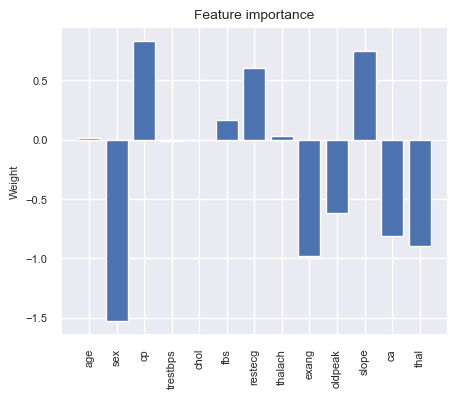

In [184]:
sns.set()
rcParams.update(plt_params)
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
plt.bar(list(best_model.feature_names_in_), list(best_model.coef_[0]));
plt.title('Feature importance')
plt.ylabel('Weight')

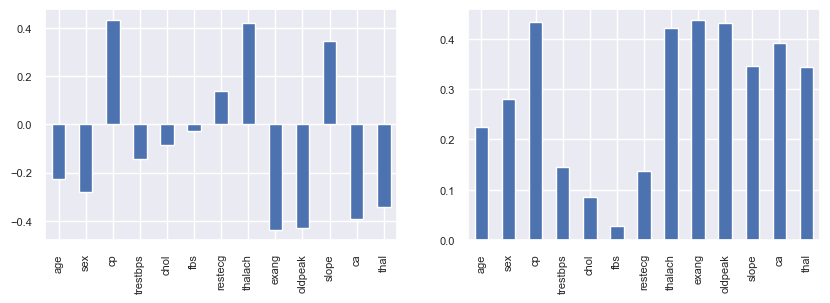

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
corr.target.iloc[:-1].plot.bar(ax=ax[0]);
corr.target.iloc[:-1].abs().plot.bar(ax=ax[1]);

## 6. Experimentation

If you haven't hit your evaluation metric yet... 

1. Could you collect more data?
2. Could you try a better moded? Like CatBoost or XGBoost
3. Could you improve the current modules?

**Trying with only the most important features**

In [193]:
print(features_name)
features_selected = features_name[np.abs(features_weight) > .5]
np.append(features_selected, 'target')

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


array(['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'], dtype=object)

In [194]:
df_features = df[np.append(features_selected, 'target')]
df_features.head()

,sex,cp,restecg,exang,oldpeak,slope,ca,thal,target
0,1,3,0,0,2.3,0,0,1,1
1,1,2,1,0,3.5,0,0,2,1
2,0,1,0,0,1.4,2,0,2,1
3,1,1,1,0,0.8,2,0,2,1
4,0,0,1,1,0.6,2,0,2,1


In [224]:
# Split data into X & y
Xf = df_features.drop(['target'], axis=1)
yf = df_features.target

# Split data into train and test sets
np.random.seed(42)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2)

# Set the models
models_f = {'Logistic': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RandomForest': RandomForestClassifier()}

# Fit and score 
model_scores_f = fit_and_score(models, Xf_train, Xf_test, yf_train, yf_test)
model_scores_f

{'Logistic': 0.8524590163934426,
 'KNN': 0.819672131147541,
 'RandomForest': 0.8852459016393442}